In [1]:
pip install torchvision

In [2]:
import pandas as pd
import numpy as np
import torchvision
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [5]:
# Data download and preprocessing
DOWNLOAD_MNIST = True # If already download , set as False
train_data = torchvision.datasets.MNIST (
    root ='./mnist/',
    train = True , # this is training data
    # transform = torchvision . transforms . ToTensor () ,
    download = DOWNLOAD_MNIST ,
)
test_data = torchvision . datasets . MNIST ( root ='./mnist/', train = False )
# change the features to numpy
X_train = train_data . train_data . numpy ()
X_test = test_data . test_data . numpy ()
# change the labels to numpy
Y_train = train_data . train_labels . numpy ()
Y_test = test_data . test_labels . numpy ()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


## Problem 1 

#### Part (a). Plot one sample in X train. What is the number you see from the 28 × 28 pixel-field? Does it match with the label in Y train?

In [6]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

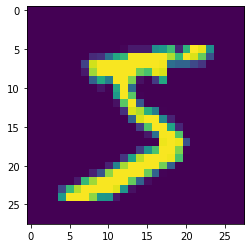

5


In [8]:
img = X_train[0].reshape((28,28))
plt.imshow(img)
plt.show()
print(Y_train[0])

ANS: We can see the first plot in X_train is the number 5 from the 28*28 field. It matches with the label in Y_train=5.

#### Part (b). What is the dimension of X train and X test? Normalize X train and X test such that the value of each element lies in [0, 1].

In [9]:
# Normalize X_train and X_test
from sklearn.preprocessing import MinMaxScaler
print(X_train.shape)
print(X_test.shape)
reshape_train=X_train.reshape(60000,28*28)
reshape_test=X_test.reshape(10000,28*28)
scaler = MinMaxScaler()
X_train=scaler.fit_transform(reshape_train)
X_test=scaler.fit_transform(reshape_test)

(60000, 28, 28)
(10000, 28, 28)


The dimension of X train is (60000,28,28). The dimension of X test is (10000,28,28).

#### Part (c). A popular choice to deal with the labels is to use the one-hot embedding. Represent Y train and Y test using one-hot embedding. List the benefit of such transformation.

In [10]:
# Transform Y_train and Y_test using one-hot embedding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(Y_train.reshape(-1,1))
onehotlabels_train = enc.transform(Y_train.reshape(-1,1)).toarray()
enc.fit(Y_test.reshape(-1,1))
onehotlabels_test=enc.transform(Y_test.reshape(-1,1)).toarray()

ANS: The benefit of this transformation is that it doesn't consider an ordinal relationship between labels or complex labels involving characters. The one-hot embedding maps each label to a binary vector. It can make our data more expressive and easy to rescale with a probability-like number for each possible label value. It can make the problem easier for the network to model. It also may offer a more nuanced set of predictions than a single label.

## Problem 2

#### Part (a). Try to implement and train the above mentioned classifier on the training dataset, and report the test errors of them using the test dataset. Can you reproduce the results? If not, please justify your reason.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=67)
model1=knn.fit(X_train,Y_train)
y_pred1 = model1.predict(X_test)
knn_score=accuracy_score(Y_test,y_pred1)
print(1-knn_score)

0.050799999999999956


We can reproduce the result using the KNN method with k=67. The test error is 5.08%, which is very close to the given result 5%. 

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12),n_estimators=70)
model2=ada.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)
ada_score=accuracy_score(Y_test,y_pred2)
print(1-ada_score)

0.03969999999999996


We can reproduce the result using the AdaBoost.M1/ C4.5 method with max_depth of decision tree is 12 and number of estimators is 70. The test error is 3.97%, which is very close to the given result 4.05%.

In [10]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=100,gamma=0.05)
model3=svc.fit(X_train, Y_train)
y_pred3 = model3.predict(X_test)
svc_score=accuracy_score(Y_test,y_pred3)
print(1-svc_score)

0.01629999999999998


We can reproduce the result using the SVM method with Gaussian Kernel, regularization C=100, and gamma=0.05. The test error is 1.63%, which is close to the given result 1.4%.

#### Part (b). Pick your favorite classifier (not limited to the above mentioned algorithms) and try to implement it on the training set and report the test error using the test dataset. Turn the hyperparameters until it out perform all three of the classifier you implemented in part 2(a).

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=11,gamma=0.1)
model3=svc.fit(X_train, Y_train)
y_pred3 = model3.predict(X_test)
svc_score=accuracy_score(Y_test,y_pred3)
print(1-svc_score)

We can further improve the result using the SVM method with Gaussian Kernel, regularization C=11, and gamma=0.1. The test error is 1.51%, which out perform all three of the classifiers that I implemented in part 2(a).

## Problem 3

### Part(a)-(b).

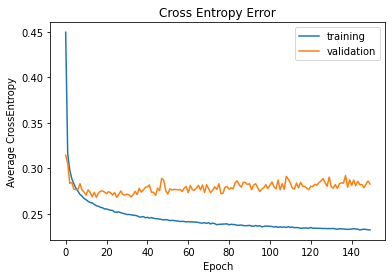

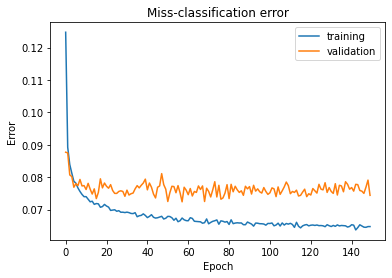

Test loss: 0.283
Test accuracy: 0.926


In [17]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(100)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test,onehotlabels_test))
loss, accuracy  = model.evaluate(X_test, onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')


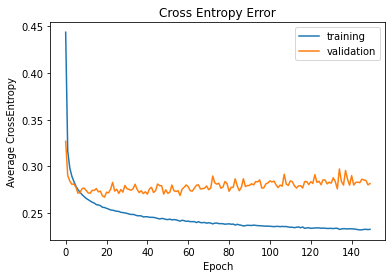

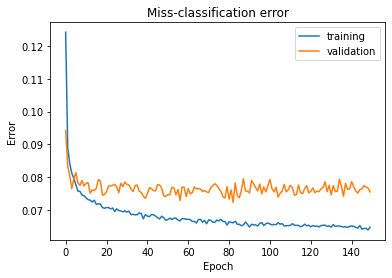

Test loss: 0.282
Test accuracy: 0.924


In [18]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(10)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test,onehotlabels_test))
loss, accuracy  = model.evaluate(X_test, onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')


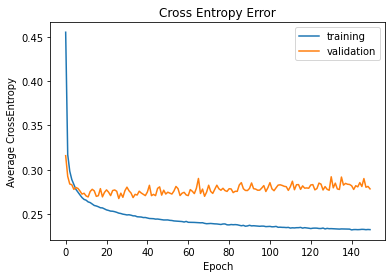

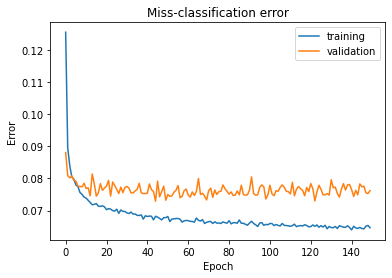

Test loss: 0.278
Test accuracy: 0.924


In [19]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(300)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test,onehotlabels_test))
loss, accuracy  = model.evaluate(X_test, onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')


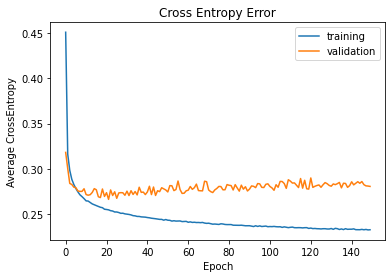

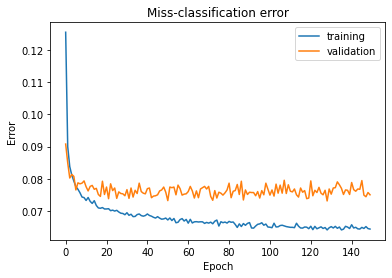

Test loss: 0.28
Test accuracy: 0.925


In [20]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(500)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test,onehotlabels_test))
loss, accuracy  = model.evaluate(X_test, onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')


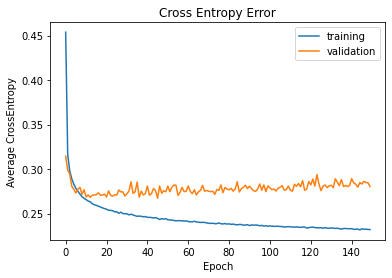

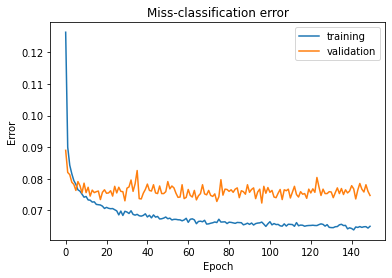

Test loss: 0.28
Test accuracy: 0.925


In [21]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(1000)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test,onehotlabels_test))
loss, accuracy  = model.evaluate(X_test, onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')


### Part(c).

ValueError: ignored

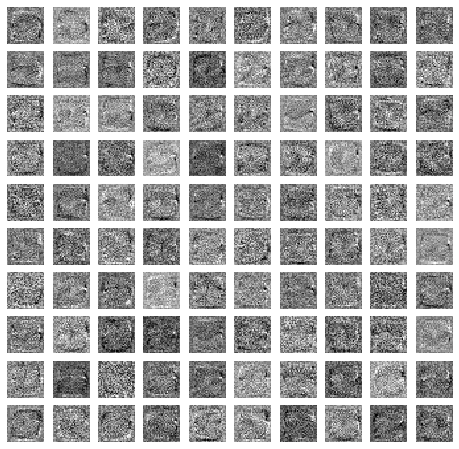

In [52]:
params = model.layers[0].get_weights()[0]
plt.figure(figsize=(8, 8))
for i in range(params.shape[0]):
    plt.subplot(10, 10, i + 1) # Since we know it is a 10 x 10 grid
    x = params[:,i]
    plt.imshow(x.reshape((28, 28)), cmap = "gray", interpolation = "nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("<filename>.png")

### Part(d).

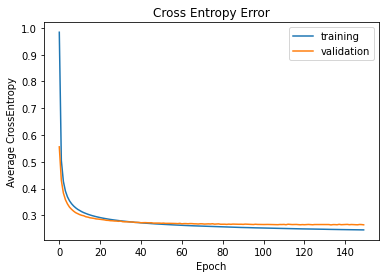

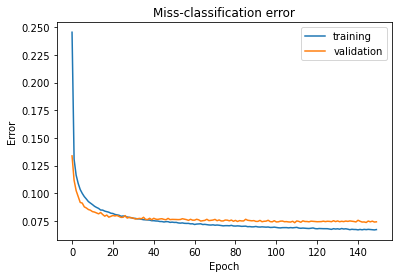

Test loss: 0.264
Test accuracy: 0.926


In [53]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(100)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test,onehotlabels_test))
loss, accuracy  = model.evaluate(X_test, onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

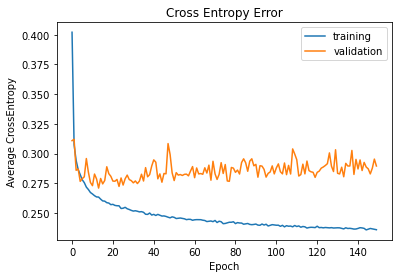

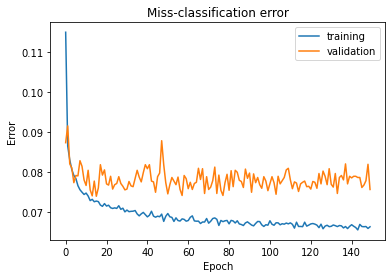

Test loss: 0.289
Test accuracy: 0.924


In [54]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(100)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.2,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test,onehotlabels_test))

loss, accuracy  = model.evaluate(X_test, onehotlabels_test, verbose=False)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

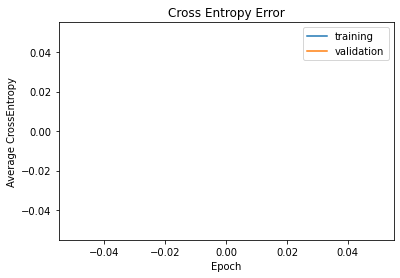

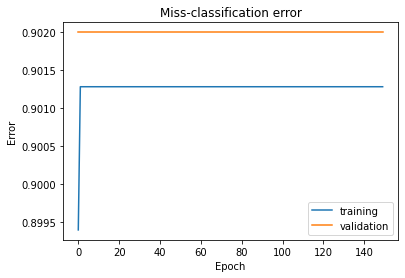

Test loss: nan
Test accuracy: 0.098


In [55]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(100)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test,onehotlabels_test))
loss, accuracy  = model.evaluate(X_test, onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

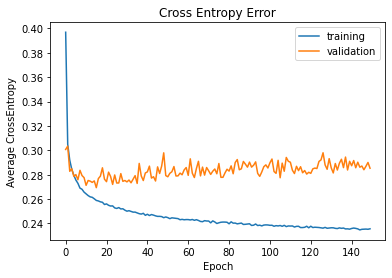

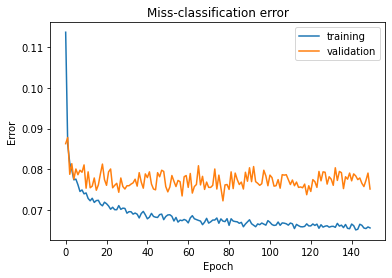

Test loss: 0.285
Test accuracy: 0.925


In [56]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(100)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.5), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test,onehotlabels_test))
loss, accuracy  = model.evaluate(X_test, onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

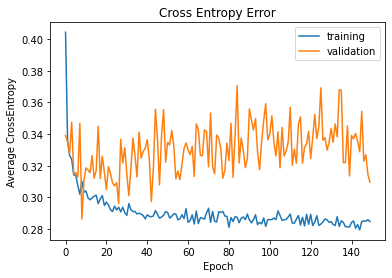

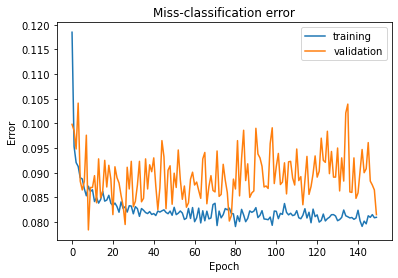

Test loss: 0.31
Test accuracy: 0.919


In [57]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(100)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test,onehotlabels_test))
loss, accuracy  = model.evaluate(X_test, onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

## Problem 4

### Part (a)-(b).

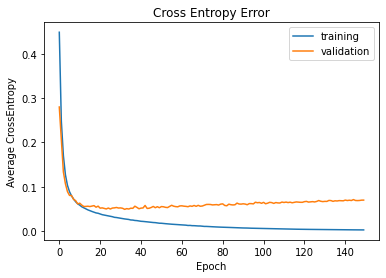

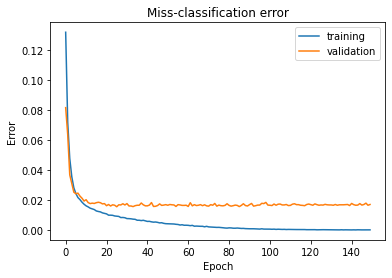

Test loss: 0.0697
Test accuracy: 0.983


In [71]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(100)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(-1,28,28), onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test.reshape(-1,28,28),onehotlabels_test))
loss, accuracy  = model.evaluate(X_test.reshape(-1,28,28), onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

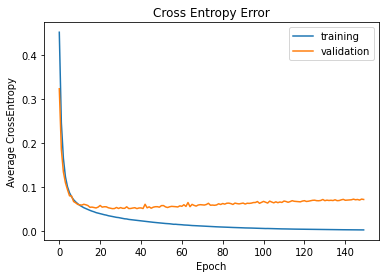

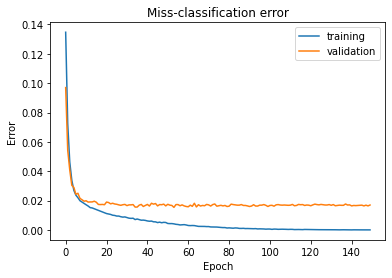

Test loss: 0.0717
Test accuracy: 0.983


In [72]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(10)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(-1,28,28), onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test.reshape(-1,28,28),onehotlabels_test))
loss, accuracy  = model.evaluate(X_test.reshape(-1,28,28), onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

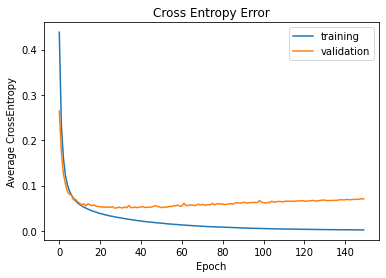

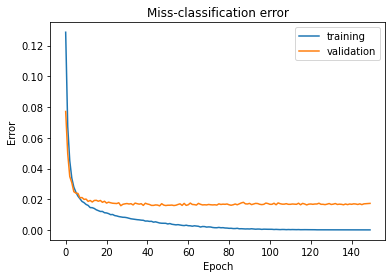

Test loss: 0.0704
Test accuracy: 0.983


In [73]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(300)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(-1,28,28), onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test.reshape(-1,28,28),onehotlabels_test))
loss, accuracy  = model.evaluate(X_test.reshape(-1,28,28), onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

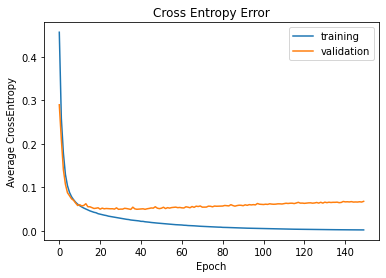

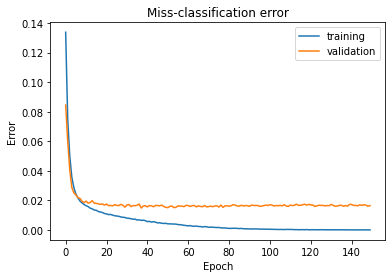

Test loss: 0.0679
Test accuracy: 0.984


In [74]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(500)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(-1,28,28), onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test.reshape(-1,28,28),onehotlabels_test))
loss, accuracy  = model.evaluate(X_test.reshape(-1,28,28), onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

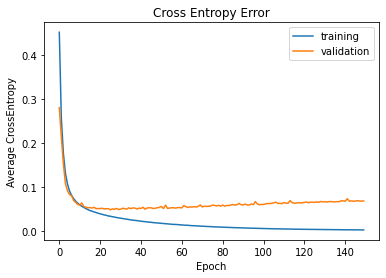

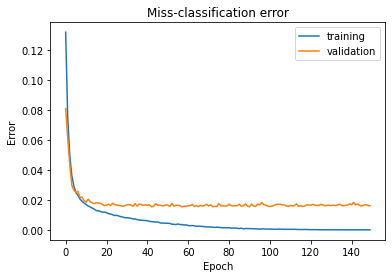

Test loss: 0.0686
Test accuracy: 0.984


In [75]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(1000)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(-1,28,28), onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test.reshape(-1,28,28),onehotlabels_test))
loss, accuracy  = model.evaluate(X_test.reshape(-1,28,28), onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

### Part (c).

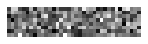

In [103]:
params = model.layers[0].get_weights()[0]
plt.figure(figsize=(8, 8))
for i in range(params.shape[0]):
    plt.subplot(10, 10, i + 1) # Since we know it is a 10 x 10 grid
    x = params[:,i]
    plt.imshow(x.reshape(8,12), cmap = "gray", interpolation = "nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("<filename>.png")


### Part(d).

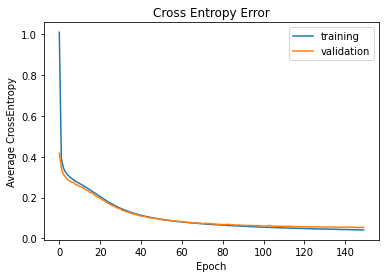

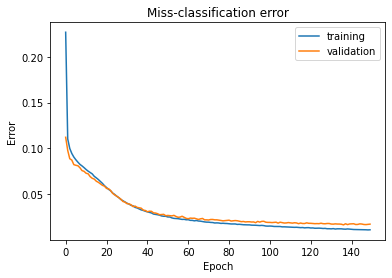

Test loss: 0.0542
Test accuracy: 0.983


In [107]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(100)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(-1,28,28), onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test.reshape(-1,28,28),onehotlabels_test))
loss, accuracy  = model.evaluate(X_test.reshape(-1,28,28), onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

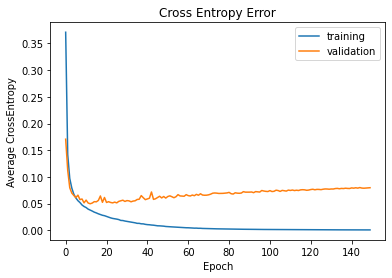

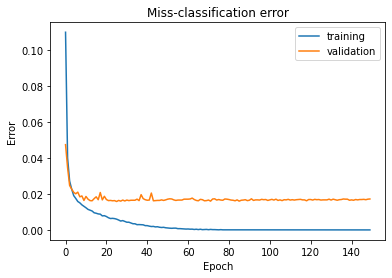

Test loss: 0.0798
Test accuracy: 0.983


In [108]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(100)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.2,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(-1,28,28), onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test.reshape(-1,28,28),onehotlabels_test))
loss, accuracy  = model.evaluate(X_test.reshape(-1,28,28), onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

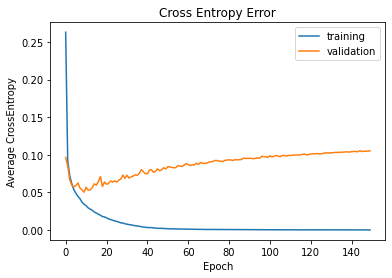

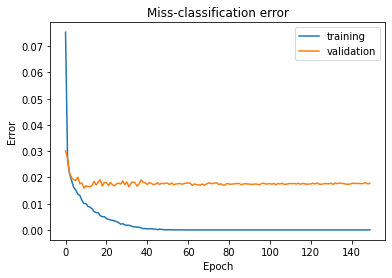

Test loss: 0.105
Test accuracy: 0.982


In [109]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(100)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5,momentum=0), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(-1,28,28), onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test.reshape(-1,28,28),onehotlabels_test))
loss, accuracy  = model.evaluate(X_test.reshape(-1,28,28), onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

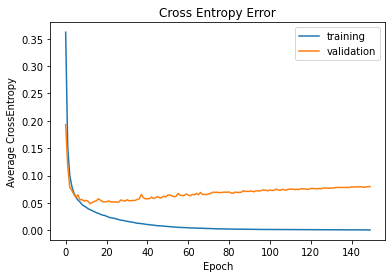

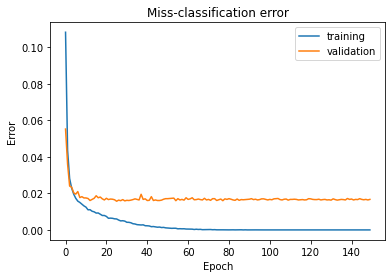

Test loss: 0.0799
Test accuracy: 0.983


In [110]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(100)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.5), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(-1,28,28), onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test.reshape(-1,28,28),onehotlabels_test))
loss, accuracy  = model.evaluate(X_test.reshape(-1,28,28), onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

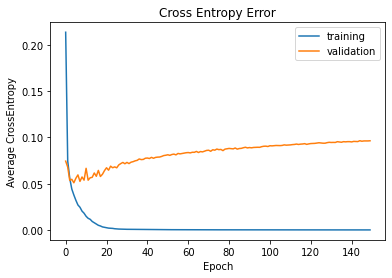

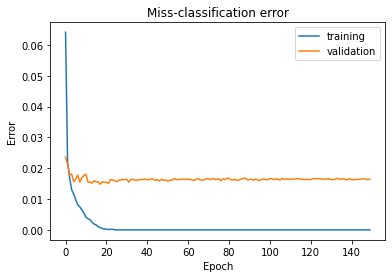

Test loss: 0.0964
Test accuracy: 0.984


In [111]:
from tensorflow import keras
# Set seed for producing results with different weights
tf.random.set_seed(100)
model = Sequential()
# The input layer requires the special input_shape parameter which should match the shape of our training data.
# Define a model with only one layer with 100 hidden units
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

# Loss is cross-entropy and optimizer is SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(-1,28,28), onehotlabels_train, batch_size=128, epochs=150, verbose=False, validation_data=(X_test.reshape(-1,28,28),onehotlabels_test))
loss, accuracy  = model.evaluate(X_test.reshape(-1,28,28), onehotlabels_test, verbose=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Error')
plt.ylabel('Average CrossEntropy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

## Question 5 CNN

### Part(a)-(b).

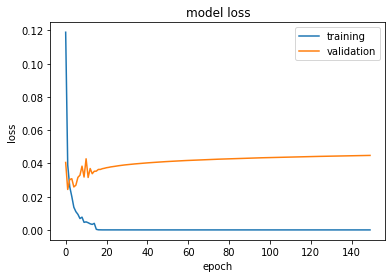

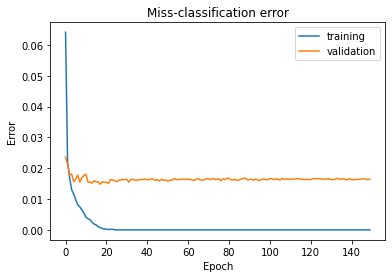

Test loss: 0.0448
Test accuracy: 0.993


In [114]:
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.1, momentum=0.5)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
model = define_model()
cnn = model.fit(X_train.reshape(-1,28,28), onehotlabels_train, epochs=150, batch_size=32, validation_data=(X_test.reshape(-1,28,28), onehotlabels_test), verbose=0)
loss, accuracy  = model.evaluate(X_test.reshape(-1,28,28), onehotlabels_test, verbose=False)

plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(1-np.array(history.history['accuracy']))
plt.plot(1-np.array(history.history['val_accuracy']))
plt.title('Miss-classification error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

ANS: We can use the convolutional neural network (CNN) model for this problem. In this model, we start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max-pooling layer. We can also increase the depth of the feature extractor part of the model, following a VGG-like pattern of adding more convolutional and pooling layers with the same sized filter, while increasing the number of filters to 64 each with another max-pooling layer. The filter maps can then be flattened to provide features to the classifier. Between the feature extractor and the output layer, we can add a dense layer with 100 nodes to interpret the features. All layers will use the ReLU activation function and the He weight initialization scheme. We will use a conservative configuration for the stochastic gradient descent optimizer with a learning rate of 0.01 and a momentum of 0.9. Then, the model will be evaluated using five-fold cross-validation. We will train the baseline model for a modest 10 training epochs with a default batch size of 32 examples. Finally, we get the test error around 0.93%, which outperforms all three of the classifiers and has the lowest test error evaluated in part 2(a).

### Part(c).

IndexError: ignored

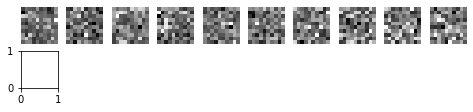

In [119]:
params = model.layers[-1].get_weights()[0]
plt.figure(figsize=(8, 8))
for i in range(params.shape[0]):
    plt.subplot(10, 10, i + 1) # Since we know it is a 10 x 10 grid
    x = params[:,i]
    plt.imshow(x.reshape(10,10), cmap = "gray", interpolation = "nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("<filename>.png")

## Problem 6

In [120]:
train = pd.read_csv("train.txt", header=None)
val = pd.read_csv("val.txt", header=None)
test = pd.read_csv("test.txt", header=None)

In [121]:
x_train_ex = np.array(train.iloc[0, 0:1568]).reshape(28, 56)

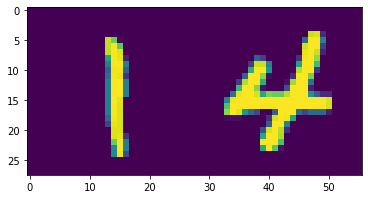

In [122]:
plt.imshow(x_train_ex)

In [123]:
train.iloc[0,1568]

5

In [124]:
x_train_ex_2 = np.array(train.iloc[1, 0:1568]).reshape(28, 56)

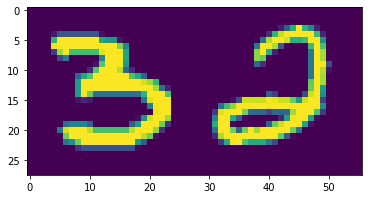

In [125]:
plt.imshow(x_train_ex_2)

In [126]:
train.iloc[1,1568]

5

## Problem 7

(1). CNN

In [127]:
x_train = train.iloc[:,0:1568]
y_train = train.iloc[:,1568]
x_val = val.iloc[:,0:1568]
y_val = val.iloc[:,1568]
x_test = test.iloc[:,0:1568]
y_test = test.iloc[:,1568]

In [129]:
import torch
import torch.nn as nn
train_inputs = np.array(x_train).reshape(20000,28,56)
train_targets = np.array(y_train)
batch_size = 100

train_inputs  = torch.tensor(train_inputs)
train_targets = torch.tensor(train_targets)
    
train_dataset = torch.utils.data.TensorDataset(train_inputs, train_targets)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle = True)

In [130]:
val_inputs = np.array(x_val).reshape(5000,28,56)
val_targets = np.array(y_val)
batch_size = 100

val_inputs  = torch.tensor(val_inputs)
val_targets = torch.tensor(val_targets)
    
val_dataset = torch.utils.data.TensorDataset(val_inputs, val_targets)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size, shuffle = False)

In [131]:
test_inputs = np.array(x_test).reshape(5000,28,56)
test_targets = np.array(y_test)
batch_size = 100

test_inputs  = torch.tensor(test_inputs)
test_targets = torch.tensor(test_targets)
    
test_dataset = torch.utils.data.TensorDataset(test_inputs, test_targets)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle = False)

In [147]:
class mcn(torch.nn.Module):
    def __init__(self):
      super(mcn, self).__init__()
      self.conv1 = nn.Sequential(         
        nn.Conv2d(1, 32, 3, 1, 1),                              
        nn.ReLU(),                      
        nn.MaxPool2d(2)    
        )
      self.conv2 = nn.Sequential(         
        nn.Conv2d(32, 64, 3, 1, 1),                              
        nn.ReLU(),                      
        nn.MaxPool2d(2)    
        )
      self.conv3 = nn.Sequential(         
        nn.Conv2d(64, 64, 3, 1, 1),                              
        nn.ReLU(),                      
        nn.Flatten()    
        )
      self.l1 = nn.Linear(64*7*14, 512)
      self.l2 = nn.Linear(512, 20)
    def forward(self, X):
      X = self.conv1(X)
      X = self.conv2(X)
      X = self.conv3(X)       
      X = nn.functional.relu(self.l1(X))
      X = self.l2(X)
      return X

In [148]:
def train_test(mod, epoch_num, learning_rate, momentum, trn_data, tst_data):

  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(mod.parameters(), lr = learning_rate, momentum = momentum)
  
  for epoch in range(epoch_num):
    tr_e = 0
    ts_e = 0
    tr_l = 0
    ts_l = 0
    for i, (data_train, target_train) in enumerate(trn_data):
      trn = data_train.float().reshape(100,1,28,56)
      out = mod(trn)
      train_pred = torch.max(out.data, 1)[1]
      tr_e += (train_pred != target_train).sum()
      batch_l = loss_fn(out, target_train)
      tr_l += batch_l
      optimizer.zero_grad()
      batch_l.backward()
      optimizer.step()
    train_loss.append(tr_l.item() / batch_size)
    train_error.append(tr_e.item() / batch_size)

    with torch.no_grad():
      for j, (data_test, target_test) in enumerate(tst_data):
        tst = data_test.float().reshape(100,1,28,56)
        out_test = mod(tst)
        test_pred = torch.max(out_test.data, 1)[1] 
        ts_e += (test_pred != target_test).sum()
        batch_l_test = loss_fn(out_test, target_test)
        ts_l += batch_l_test
    test_loss.append(ts_l.item() / batch_size)
    test_error.append(ts_e.item() / batch_size)

def loss_error_graph(repeat, epoch_num):
   
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
    ax1.plot([x/100 for x in train_loss][(repeat-1)*epoch_num: epoch_num*repeat], label = "train loss")
    ax1.plot([x/100 for x in test_loss][(repeat-1)*epoch_num: epoch_num*repeat], label = "test loss")
    ax1.set_title("Cross Entropy Error: each epoch")
    ax1.legend()

    ax2.plot([x/100 for x in train_error][(repeat-1)*epoch_num: epoch_num*repeat], label = "train error")
    ax2.plot([x/100 for x in test_error][(repeat-1)*epoch_num: epoch_num*repeat], label = "test error")
    ax2.axis(ymin=0, ymax=1)
    ax2.set_title("Mis-classification Error: each epoch")
    ax2.legend()

In [149]:
train_loss = []
test_loss = []
train_error = []
test_error = []

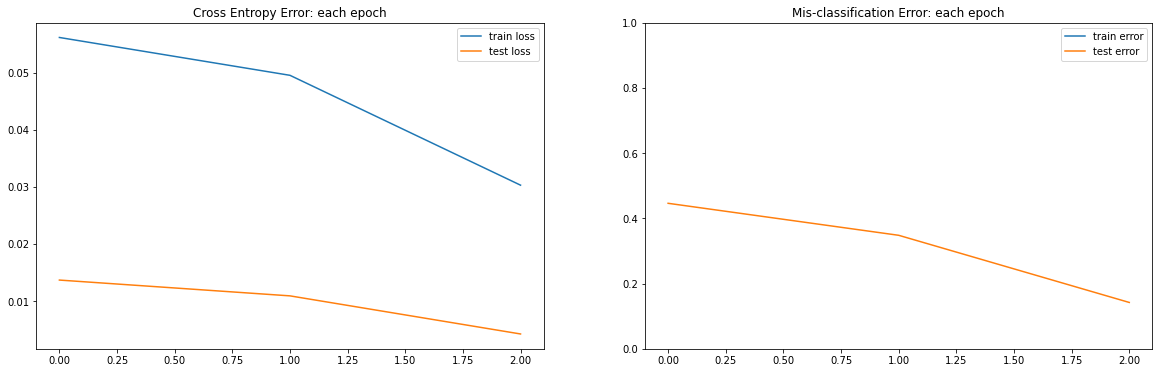

In [151]:
mcn_1 = mcn()
train_test(mcn_1, 20, 0.1, 0.0, train_loader, test_loader)
loss_error_graph(1,3)

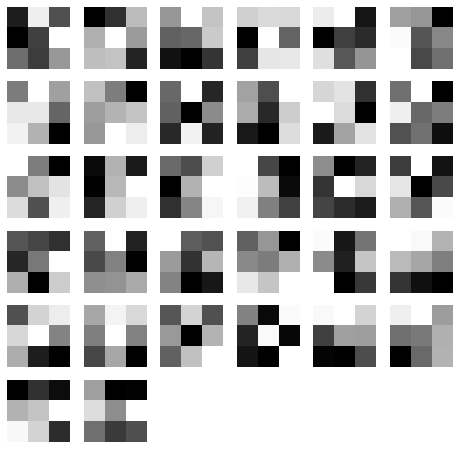

In [152]:
params = list(mcn_1.parameters())[0]
plt.figure(figsize=(8, 8))
for i in range(params.shape[0]):
    plt.subplot(6, 6, i + 1)
    x = params[i,:].detach().numpy()
    plt.imshow(x.reshape((3, 3)), cmap = "gray", interpolation = "nearest")
    plt.axis("off")

(2). CNN model with dropout in training

In [153]:
class mcndrop(torch.nn.Module):
    def __init__(self):
      super(mcndrop, self).__init__()
      self.conv1 = nn.Sequential(         
        nn.Conv2d(1, 32, 3, 1, 1),                              
        nn.ReLU(),                      
        nn.MaxPool2d(2)    
        )
      self.conv2 = nn.Sequential(         
        nn.Conv2d(32, 64, 3, 1, 1),                              
        nn.ReLU(),                      
        nn.MaxPool2d(2)    
        )
      self.conv3 = nn.Sequential(         
        nn.Conv2d(64, 64, 3, 1, 1),                              
        nn.ReLU(),                      
        nn.Flatten()    
        )
      self.l1 = nn.Linear(64*7*14, 512)
      self.drop = nn.Dropout(p=0.5)
      self.l2 = nn.Linear(512, 20)
    def forward(self, X):
      X = self.conv1(X)
      X = self.conv2(X)
      X = self.conv3(X)       
      X = nn.functional.relu(self.l1(X))
      X = self.drop(X)
      X = self.l2(X)
      return X

In [154]:
train_loss = []
test_loss = []
train_error = []
test_error = []

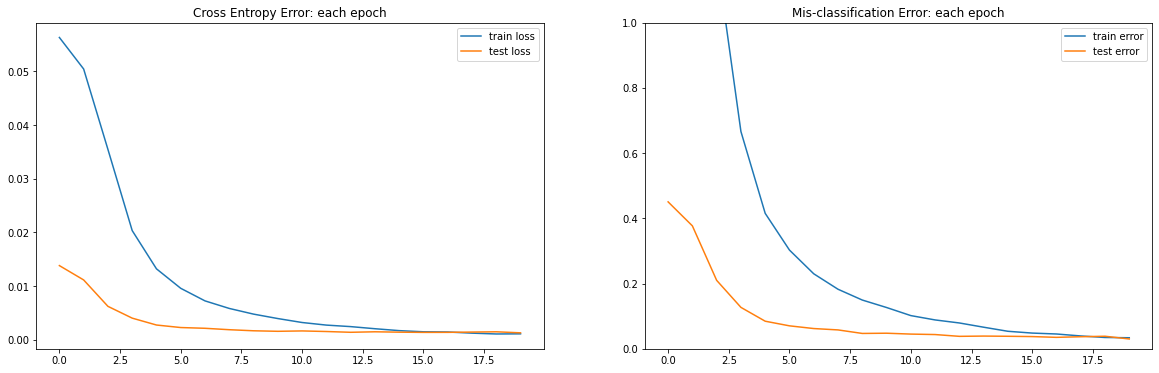

In [155]:
mcndrop_1 = mcndrop()
train_test(mcndrop_1, 20, 0.1, 0.0, train_loader, test_loader)
loss_error_graph(1,150)

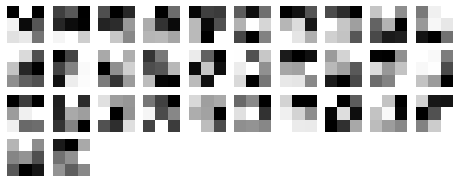

In [158]:
params = list(mcndrop_1.parameters())[0]
plt.figure(figsize=(8, 8))
for i in range(params.shape[0]):
    plt.subplot(10, 10, i + 1) # Since we know it is a 10 x 10 grid
    x = params[i,:].detach().numpy()
    plt.imshow(x.reshape((3, 3)), cmap = "gray", interpolation = "nearest")
    plt.axis("off")